# Decision Tree on Iris dataset

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt #for visualizing the data
import pandas as pd 
from sklearn import datasets #To import the standard datasets

# Load the iris dataset features
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df.shape

(150, 4)

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
#Loading the dataset labels
y=dataset.target
print(len(y))
print(y)

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Checking for missing values

In [4]:
#counting missing values in dataset features
count = 0
for i in df:
    for j in df[i].isnull():
        if j==True:
              count = count+1
print(count)
#counting missing values in dataset labels
count = 0
for i in y:
  if i == None:
    count=count+1
print(count)

0
0


We can see from the above result that there is no missing value

## Split Dataset into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)


## Train a decision tree model and plot it

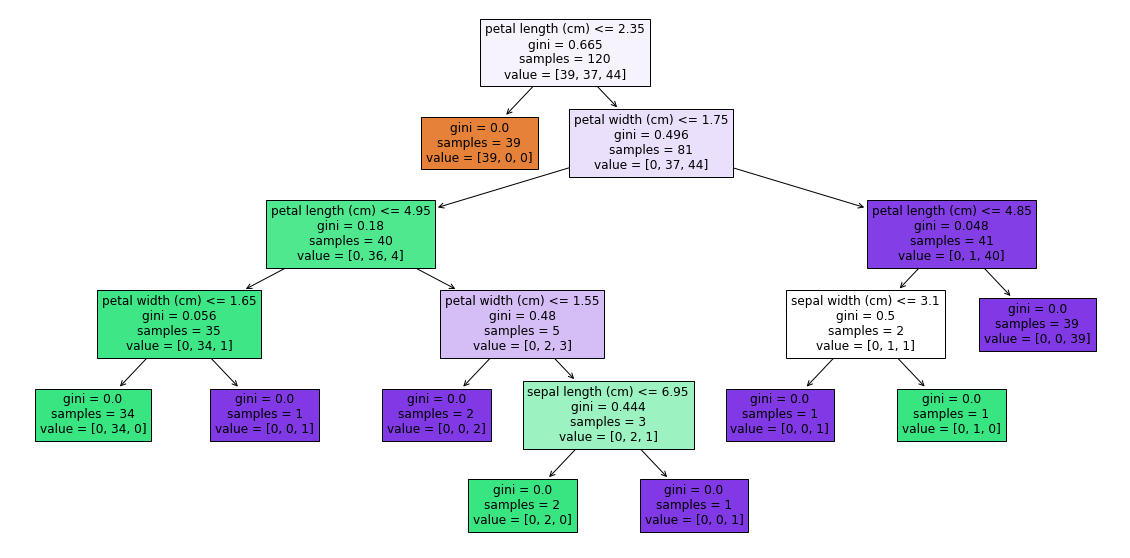

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Apply the decision tree classifier model to the data using all four parameters at once.
classifier = DecisionTreeClassifier().fit(X_train, y_train)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(classifier,feature_names=df.columns, filled=True)
# Display the tree plot figure.
plt.show()

## Evaluating the model with confusion matrix and accuracy score

In [19]:
#Evaluating the Model
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0